In [1]:
!pip install matplotlib deap

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


In [3]:
num_locations = random.randint(25,40)  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 200), random.randint(0, 200)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (random.randint(80,120), random.randint(80,120))  # Define the central depot location as a fixed point
num_vehicles = random.randint(5,8)  # Define how many vehicles are available to visit the locations

In [4]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

In [5]:
#Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

In [6]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [7]:
toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [8]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [9]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 500, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

gen	nevals	avg    	min    
0  	300   	1959.18	23.0492
1  	222   	1898.59	47.9172
2  	228   	1894.16	31.0018
3  	236   	1879.45	43.3242
4  	241   	1877.7 	38.8499
5  	233   	1855.1 	42.1869
6  	220   	1851.36	42.1869
7  	215   	1825.49	25.8551
8  	229   	1835.5 	40.5868
9  	224   	1826.09	42.1869
10 	233   	1820.91	33.6578
11 	240   	1839.81	42.1869
12 	223   	1801.5 	25.4811
13 	226   	1805.77	37.1786
14 	214   	1793.12	37.1786
15 	221   	1782.3 	41.9552
16 	222   	1773.7 	25.3247
17 	229   	1772.4 	16.9622
18 	224   	1757.99	16.9622
19 	235   	1754.1 	16.9622
20 	229   	1747.89	16.9622
21 	242   	1744.06	23.6413
22 	224   	1704.51	21.7809
23 	252   	1664.5 	21.7809
24 	236   	1613.43	21.3189
25 	234   	1553.13	21.3687
26 	225   	1519.17	21.3687
27 	217   	1463.72	21.1674
28 	225   	1415.93	14.9248
29 	230   	1381.87	16.845 
30 	236   	1359.26	16.097 
31 	230   	1336.65	17.5369
32 	231   	1311.76	17.5369
33 	236   	1295.66	25.3035
34 	219   	1283.61	17.4986
35 	223   	1255.5 	29.011 
3

305	226   	892.407	33.2629
306	217   	878.088	36.2228
307	229   	879.677	35.0381
308	212   	893.017	20.6043
309	202   	879.759	38.1636
310	214   	884.176	38.4914
311	233   	886.738	30.1095
312	223   	890.337	30.0575
313	225   	879.921	35.3835
314	235   	898.268	35.804 
315	238   	895.415	35.3921
316	223   	888.998	37.8281
317	246   	896.348	33.7651
318	236   	882.264	33.7651
319	223   	881.185	35.3921
320	238   	892.95 	36.3841
321	237   	882.204	39.4122
322	220   	881.312	38.9977
323	242   	895.243	37.0553
324	238   	894.331	33.7651
325	232   	888.898	31.1241
326	215   	887.512	32.8434
327	218   	903.109	24.6135
328	231   	889.114	39.8369
329	236   	881.897	39.8828
330	236   	885.353	35.804 
331	221   	884.012	35.804 
332	214   	903.072	35.9053
333	232   	882.249	36.8718
334	222   	890.322	35.3921
335	231   	880.61 	33.0075
336	232   	897.34 	33.2629
337	221   	879.227	37.606 
338	216   	885.522	39.8828
339	224   	896.873	37.0553
340	241   	893.082	39.0399
341	232   	885.942	36.4938
3

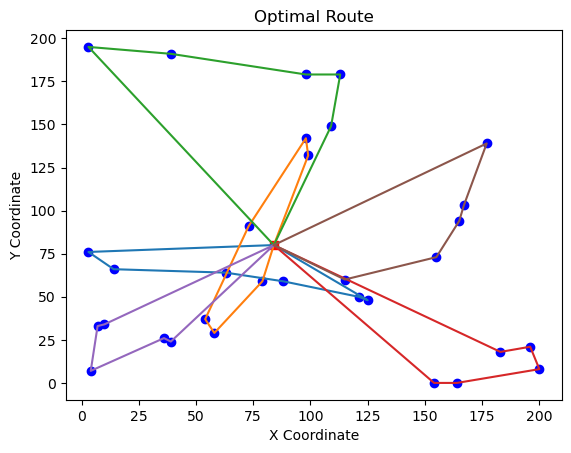

In [10]:
if __name__ == "__main__":
    main()